In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib as plt

In [7]:
df = pd.read_csv(r'C:\Users\German\Desktop\train_data_us.csv')

In [8]:
df

,last_price,total_area,bedrooms,ceiling_height,floors_total,living_area,floor,bike_parking,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest
0,108000.0,59.0,2,2.87,4,31.5,2,0,0,0,6.6,0,20485,8180
1,264000.0,109.0,4,3.15,5,72.0,2,0,0,0,12.2,0,42683,8643
2,140000.0,74.5,3,2.58,10,49.0,9,0,0,0,10.8,0,14078,16670
3,64000.0,37.4,1,2.50,9,20.0,4,0,0,0,6.2,2,17792,17699
4,133000.0,64.9,3,2.65,12,41.9,11,0,0,0,10.4,0,14767,10573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,100000.0,40.1,1,2.65,10,20.1,6,0,0,0,10.8,1,26495,14198
6491,307000.0,158.5,7,2.95,7,57.4,7,0,0,0,12.4,1,23546,3088
6492,137000.0,62.1,2,2.75,20,31.0,6,0,0,0,13.9,2,34506,14375
6493,113000.0,66.0,3,2.50,12,42.2,6,0,0,0,10.5,0,12892,11225


In [9]:
df.head()

,last_price,total_area,bedrooms,ceiling_height,floors_total,living_area,floor,bike_parking,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest
0,108000.0,59.0,2,2.87,4,31.5,2,0,0,0,6.6,0,20485,8180
1,264000.0,109.0,4,3.15,5,72.0,2,0,0,0,12.2,0,42683,8643
2,140000.0,74.5,3,2.58,10,49.0,9,0,0,0,10.8,0,14078,16670
3,64000.0,37.4,1,2.50,9,20.0,4,0,0,0,6.2,2,17792,17699
4,133000.0,64.9,3,2.65,12,41.9,11,0,0,0,10.4,0,14767,10573


In [10]:
df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

In [11]:
df.head()

,last_price,total_area,bedrooms,ceiling_height,floors_total,living_area,floor,bike_parking,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,price_class
0,108000.0,59.0,2,2.87,4,31.5,2,0,0,0,6.6,0,20485,8180,0.0
1,264000.0,109.0,4,3.15,5,72.0,2,0,0,0,12.2,0,42683,8643,1.0
2,140000.0,74.5,3,2.58,10,49.0,9,0,0,0,10.8,0,14078,16670,1.0
3,64000.0,37.4,1,2.50,9,20.0,4,0,0,0,6.2,2,17792,17699,0.0
4,133000.0,64.9,3,2.65,12,41.9,11,0,0,0,10.4,0,14767,10573,1.0


In [12]:
df['price_class']

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
6490    0.0
6491    1.0
6492    1.0
6493    0.0
6494    0.0
Name: price_class, Length: 6495, dtype: float64

In [13]:
df['price_class'].unique()

array([0., 1.])

In [14]:
X= df.drop(['last_price', 'price_class'], axis=1)
y = df['price_class']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
base_preds = model.predict(X_test)

In [20]:
base_preds

array([0., 0., 1., ..., 0., 1., 0.])

In [21]:
print('Predictions:', base_preds)
print('Correct answers:', df['price_class'])# по 1 заданию

Predictions: [0. 0. 1. ... 0. 1. 0.]
Correct answers: 0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
6490    0.0
6491    1.0
6492    1.0
6493    0.0
6494    0.0
Name: price_class, Length: 6495, dtype: float64


In [22]:
len(base_preds)

1949

In [23]:
len(df)

6495

In [25]:
y_test

2471    0.0
2484    0.0
4946    1.0
6347    1.0
519     1.0
       ... 
914     0.0
1403    0.0
3823    0.0
5658    1.0
2722    0.0
Name: price_class, Length: 1949, dtype: float64

In [24]:
len(y_test)

1949

In [37]:
len(X_train)

4546

In [30]:
from sklearn.tree import plot_tree

[Text(0.5438439683690157, 0.9761904761904762, 'X[0] <= 60.75\ngini = 0.5\nsamples = 4546\nvalue = [2282, 2264]'),
 Text(0.24018384812667262, 0.9285714285714286, 'X[0] <= 46.85\ngini = 0.315\nsamples = 2603\nvalue = [2094, 509]'),
 Text(0.09734611953612846, 0.8809523809523809, 'X[12] <= 7935.5\ngini = 0.132\nsamples = 1606\nvalue = [1492, 114]'),
 Text(0.033303597977995834, 0.8333333333333334, 'X[9] <= 8.95\ngini = 0.465\nsamples = 136\nvalue = [86, 50]'),
 Text(0.01784121320249777, 0.7857142857142857, 'X[0] <= 41.65\ngini = 0.289\nsamples = 80\nvalue = [66, 14]'),
 Text(0.00951531370799881, 0.7380952380952381, 'X[12] <= 530.5\ngini = 0.137\nsamples = 54\nvalue = [50, 4]'),
 Text(0.007136485280999108, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.011894142134998514, 0.6904761904761905, 'X[10] <= 0.5\ngini = 0.107\nsamples = 53\nvalue = [50, 3]'),
 Text(0.007136485280999108, 0.6428571428571429, 'X[3] <= 4.5\ngini = 0.043\nsamples = 45\nvalue = [44, 1]'),
 Text(0

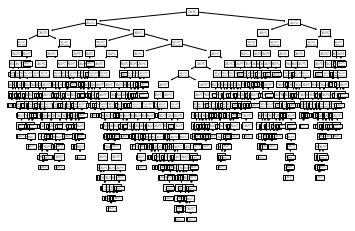

In [32]:
plot_tree(model)# по 1 заданию

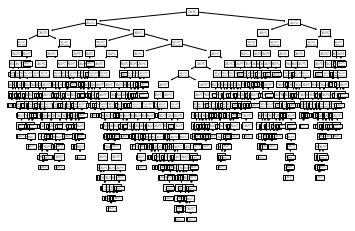

In [33]:
plot_tree(model);

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [28]:
print(classification_report(y_test,base_preds))# по 2 заданию

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       976
         1.0       0.85      0.83      0.84       973

    accuracy                           0.85      1949
   macro avg       0.85      0.85      0.85      1949
weighted avg       0.85      0.85      0.85      1949



c:\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


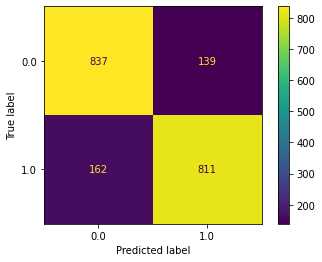

In [29]:
plot_confusion_matrix(model,X_test,y_test)

In [38]:
model.score(X_test,y_test)# по 2 заданию

0.8455618265777322